# 데이터 준비

In [1]:
from sklearn.datasets import load_wine
from sklearn.datasets import load_digits
from sklearn.datasets import load_breast_cancer

wine = load_wine()

digits = load_digits()

breast_cancer = load_breast_cancer()

# 필요한 모듈 불러오기

In [2]:
from sklearn.model_selection import train_test_split

**모델 모듈**

In [3]:
from sklearn.tree import DecisionTreeClassifier  #의사결정나무
from sklearn.ensemble import RandomForestClassifier  #랜덤포레스트
from sklearn import svm  #SVM
from sklearn.linear_model import SGDClassifier  #SGD
from sklearn.linear_model import LogisticRegression #로지스틱회귀

In [4]:
#모델 평가
from sklearn.metrics import classification_report  
from sklearn.metrics import accuracy_score  #정확도
from sklearn.metrics import confusion_matrix #오차행렬

# 손글씨 이미지 분류

## 데이터 이해하기

In [5]:
#feature data 지정
digits_data = digits.data

In [6]:
digits_data.shape    # digit 데이터의 개수 확인

(1797, 64)

In [7]:
#label 데이터 지정
digits_label = digits.target

In [8]:
#target names 출력
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
digits_label

array([0, 1, 2, ..., 8, 9, 8])

In [10]:
digits.feature_names
#픽셀로 표현되어 있음 -> 데이터프레임 데이터가 아니라 이미지라서

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

### 데이터 describe

In [11]:
print(digits.DESCR)

# 8x8 이미지가 데이터

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [12]:
digits_data[0].shape
#64개의 array
#(8x8)크기의 이미지를 일렬로 쭉 펴놓은 것

(64,)

### 데이터 그려보기

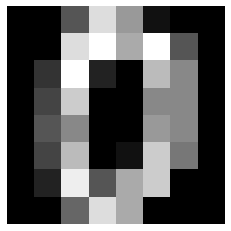

In [13]:
# 0번 째 데이터 그려보기

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
                                #일렬로 펴진 64개의 데이터를 reshape 해줌
plt.axis('off')
#출력할 때 눈금을 없애줌
plt.show()

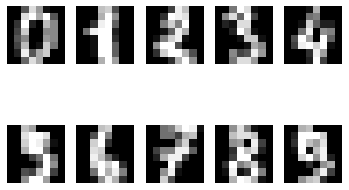

In [14]:
# 0~9 번째 데이터 그려보기
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

## train, test 데이터 분리

In [15]:
x_train, x_test, y_train, y_test = train_test_split(digits_data, digits_label,
                                                   test_size = 0.2, random_state= 1,
                                                   stratify=digits_label)

#test_size -> train과 test 데이터의 비율을 맞춰줌. 지금은 train:test = 8:2
#random_state -> train 데이터와 test 데이터를 분리하는데 적용되는 랜덤성을 결정. 
#                내가 실험한 결과를 다른 사람의 컴퓨터에서도 재현가능(reproducible) 하게 하기 위해서도 필요
#stratify -> 데이터 셋이 작아서 큰 차이는 없겠지만 학습데이터와 테스트 데이터에 들어가는 라벨의 비율이 비슷하게 만들어줌

## 모델학습

### Decision Tree

In [16]:
decision_tree = DecisionTreeClassifier(random_state = 1004)
decision_tree.fit(x_train, y_train)
y_pred_decision = decision_tree.predict(x_test)

### Random Forest

In [17]:
random_forest = RandomForestClassifier(random_state = 1004)
random_forest.fit(x_train, y_train)
y_pred_random = random_forest.predict(x_test)

### SVM

In [18]:
svm_model = svm.SVC(random_state = 1004)
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)

### SGD Classifier

In [19]:
sgd = SGDClassifier(random_state = 1004)
sgd.fit(x_train, y_train)
y_pred_sgd = sgd.predict(x_test)

### Logistic Regression

In [20]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
# 'max_iter'까지 학습했으나 아직 정답에 수렴하지 못한 상태

/Users/kyungbeen/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**구글링으로 iterator의 수를 늘려야 한다는 해결방안을 통해 경고문 해결**

In [21]:
lr = LogisticRegression(random_state = 1004, max_iter = 4000)
                                            #숫자를 늘리니까 셀 작동 시간이 늘어남
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

## 모델 평가

이 문제의 경우, 손글씨 숫자를 얼마나 정확하게 알아보느냐에 따라 모델의 성능이 평가되어야 한다고 생각한다. 

금융 문제나 시험과 같은 민감한 문제가 아닌 단순 이미지 인식 문제이기 때문이다. 

그렇기 때문에 전체 데이터 중 올바르게 판단한 데이터 개수의 비율인 Accuracy가 이 문제에 적합한 평가지표라고 판단했다.

### 정확도 평가

In [22]:
import pandas as pd
import numpy as np

preds = [y_pred_decision, y_pred_random, y_pred_svm, y_pred_sgd, y_pred_lr]
accuracy_scores = []
for i in preds:
    accuracy = accuracy_score(y_test, i)
    accuracy_scores.append(accuracy)

#결과를 편하게 비교하기 위해 값들에 이름을 붙여줌
name = ['DecisionTree', 'RandomForest', 'SVM', 'SGD', 'LogisticRegression']

compare = list(zip(name, accuracy_scores))
compare

#결과를 보았을 때, SVM이 가장 잘 나옴

[('DecisionTree', 0.8444444444444444),
 ('RandomForest', 0.9777777777777777),
 ('SVM', 0.9916666666666667),
 ('SGD', 0.9583333333333334),
 ('LogisticRegression', 0.9583333333333334)]

**정확도의 오류를 피하기 위해 collection 모듈을 사용하여 배열의 항목 당 개수를 구함**

In [23]:
import collections
print(collections.Counter(digits_label))

Counter({3: 183, 1: 182, 5: 182, 4: 181, 6: 181, 9: 180, 7: 179, 0: 178, 2: 177, 8: 174})


In [24]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        36
           5       1.00      0.95      0.97        37
           6       0.97      1.00      0.99        36
           7       1.00      1.00      1.00        36
           8       1.00      0.97      0.99        35
           9       0.97      1.00      0.99        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



 정확도의 오류를 알아보기 위해 collection 모듈을 불러와 digits_label의 항목당 개수를 확인해 보았고, 
 
 고르게 분포되어있다는 것을 확인했다. 
 
 Decision Tree를 제외한 모든 모델이 0.95 이상의 성능을 보이며 대체적으로 잘 학습되었다는 것을 알 수 있다. 
 
 따라서 해당 문제의 평가 지표는 정확도(Accuracy)이고, 가장 성능이 높은 모델은 SVM이다. 
 
 또한  재현율, 정밀도, F1-score 모두 높은 성능을 보였다.

# 와인 분류

## 데이터 이해하기

In [25]:
wine_data = wine.data   #feature 지정
wine_label = wine.target    #label 지정

In [26]:
wine_data.shape    # wine 데이터의 개수 확인

(178, 13)

In [27]:
wine.target_names
#클래스는 총 3개

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [28]:
wine_data.shape
# 13개의 feature
# 178개

(178, 13)

### 데이터 Describe

In [29]:
print(wine.DESCR)
# 총 13개의 feature 모두 수치형 데이터
# 결측치가 없음
# 같은 이탈리아지방에서 재배되었지만 경작한 사람이 다름
# 클래스의 의미가 단순 분류. 순위를 나타내는 것은 아닌 것으로 생각됨

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## train, test 데이터 분리

In [30]:
x2_train, x2_test, y2_train, y2_test = train_test_split(wine_data, wine_label,
                                                   test_size = 0.2, random_state= 1,
                                                   stratify=wine_label)

## 모델 학습

### Decision Tree

In [31]:
decision_tree = DecisionTreeClassifier(random_state = 8282)
decision_tree.fit(x2_train, y2_train)
y2_pred_decision = decision_tree.predict(x2_test)

### Random Forest

In [32]:
random_forest = RandomForestClassifier(random_state = 8282)
random_forest.fit(x2_train, y2_train)
y2_pred_random = random_forest.predict(x2_test)

### SVM

In [33]:
svm_model = svm.SVC(random_state = 8282)
svm_model.fit(x2_train, y2_train)
y2_pred_svm = svm_model.predict(x2_test)

### SGDClassifier

In [34]:
sgd = SGDClassifier(random_state = 8282)
sgd.fit(x2_train, y2_train)
y2_pred_sgd = sgd.predict(x2_test)

### Logistic Regression

In [35]:
lr = LogisticRegression(random_state = 8282, max_iter = 4000)
lr.fit(x2_train, y2_train)
y2_pred_lr = lr.predict(x2_test)

## 모델 평가

**정확도의 오류를 피하기 위해 collection 모듈을 사용하여 배열의 항목 당 개수를 구함**

In [36]:
import collections
print(collections.Counter(wine_label))

Counter({1: 71, 0: 59, 2: 48})


이 문제의 경우, 클래스가 3개로 나뉘어 있지만 데이터 해설을 보았을 때 와인의 순위를 나누는 것이 아닌 단순 다중 분류 문제이다.

그렇기 때문에 음성인데 양성으로 판단하는 경우가 적어야 한다거나, 양성인데 음성으로 판단하는 경우가 적어야 한다는 이슈는 해당되지 않는다고 생각한다.

또한 label의 분포 또한 편차가 있지만 불균형의 정도가 심하지 않기 때문에 이 문제의 평가지표를 Accuracy(정확도)로 선택했다.

### 정확도 평가

In [37]:
import pandas as pd
import numpy as np

preds2 = [y2_pred_decision, y2_pred_random, y2_pred_svm, y2_pred_sgd, y2_pred_lr]
accuracy2_scores = []
for i in preds2:
    accuracy2 = accuracy_score(y2_test, i)
    accuracy2_scores.append(accuracy2)

#결과를 편하게 비교하기 위해 값들에 이름을 붙여줌
name = ['DecisionTree', 'RandomForest', 'SVM', 'SGD', 'LogisticRegression']

compare2 = list(zip(name, accuracy2_scores))
compare2

#결과를 보았을 때, RandomForest와 LogisticRegression이 가장 잘 나옴

[('DecisionTree', 0.9444444444444444),
 ('RandomForest', 1.0),
 ('SVM', 0.6111111111111112),
 ('SGD', 0.5555555555555556),
 ('LogisticRegression', 1.0)]

**Random Forest 정밀도, 재현율, F1-score 확인**

In [38]:
print(classification_report(y2_test, y2_pred_random))
# 모두 1로 정확한 예측이 진행된 것을 알 수 있다.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



**Logistic Regression 정밀도, 재현율, F1-score 확인**

In [39]:
print(classification_report(y2_test, y2_pred_lr))
# 모두 1로 정확한 예측이 진행된 것을 알 수 있다.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



- RandomForest, Logistic Regression 과 SGD, SVM의 성능 격차가 커서 확인해 보았다.

**SGD 정밀도, 재현율, F1-score 확인**

In [40]:
print(classification_report(y2_test, y2_pred_sgd))

# 2에 대한 precision이 1인 것으로 보아,
# 2라고 예측한 것이 모두 실제로 2이지만, 2라고 예측하지 않은 것 중에 2가 있을 확률이 높을 것이다.
# 0에 대한 recall이 1인 것으로 보아,
# 실제로 0인 것 중에 0이라고 예측한 것의 개수가 같지만, 0이 아닌 것 중에 0이라고 예측한 확률이 높을 것이다.

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        12
           1       0.67      0.43      0.52        14
           2       1.00      0.20      0.33        10

    accuracy                           0.56        36
   macro avg       0.72      0.54      0.50        36
weighted avg       0.70      0.56      0.51        36



**SVM 정밀도, 재현율, F1-score 확인**

In [41]:
print(classification_report(y2_test, y2_pred_svm))

# precision, recall, f1-score 모두 0에 대한 예측도가 높지만
# 1, 2에 대한 예측도는 낮다.
# 3개의 label 중 1의 개수가 가장 많은데 0에 대한 예측도가 높은 게 신기하다.

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.54      0.50      0.52        14
           2       0.36      0.40      0.38        10

    accuracy                           0.61        36
   macro avg       0.61      0.61      0.61        36
weighted avg       0.62      0.61      0.61        36



Random Forest와 Logistic Regression의 예측 정확도가 1.0으로 label을 정확히 예측한 것을 알 수 있다.

모델의 성능이 대체적으로 좋았던 손글씨 분류 문제와는 다르게 SVM과 SGD의 성능이 훨씬 떨어졌다.

SVM의 경우 이진 분류 문제에 특화되어 있는 선형 분류 알고리즘이기 때문에 이러한 결과가 나온 것으로 예상되며,

SGD의 경우 데이터의 수가 적기 때문에 반복이 충분하게 이루어져 그만큼 노이즈가 생성된 것으로 예상된다.

# 유방암 여부 진단

## 데이터 이해하기

In [42]:
breast_cancer_data = breast_cancer.data   #feature 지정
breast_cancer_label = breast_cancer.target    #label 지정

In [43]:
breast_cancer_data.shape    # breast_cancer 데이터의 개수 확인

(569, 30)

In [44]:
breast_cancer.target_names
# malignant -> 악성 
# benign -> 양성(괜찮음)

array(['malignant', 'benign'], dtype='<U9')

In [45]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

### 데이터 Describe

In [46]:
print(breast_cancer.DESCR)
# 569개의 데이터
# 30개의 feature

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## train, test 데이터 분리

In [47]:
x3_train, x3_test, y3_train, y3_test = train_test_split(breast_cancer_data, breast_cancer_label,
                                                       test_size = 0.2, random_state = 1,
                                                       stratify = breast_cancer_label)

## 모델 학습

### Decision Tree

In [48]:
decision_tree = DecisionTreeClassifier(random_state = 5959)
decision_tree.fit(x3_train, y3_train)
y3_pred_decision = decision_tree.predict(x3_test)

### Random Forest

In [49]:
random_forest = RandomForestClassifier(random_state = 5959)
random_forest.fit(x3_train, y3_train)
y3_pred_random = random_forest.predict(x3_test)

### SVM

In [50]:
from sklearn import svm
svm_model = svm.SVC(random_state = 5959)
svm_model.fit(x3_train, y3_train)
y3_pred_svm = svm_model.predict(x3_test)

### SGDClassifier

In [51]:
sgd = SGDClassifier(random_state = 5959)
sgd.fit(x3_train, y3_train)
y3_pred_sgd = sgd.predict(x3_test)

### Logistic Regression

In [52]:
lr = LogisticRegression(random_state = 5959, max_iter = 4000)
                                            # 경고문구 해결
lr.fit(x3_train, y3_train)
y3_pred_lr = lr.predict(x3_test)

## 모델 평가

이 문제의 경우, 양성(malignant, True)인 경우 음성(benign, False)으로 판단할 경우가 적어야 한다.

그렇기 때문에 평가지표는 Recall(재현율)을 사용했다.

재현율만 비교하면 되기 때문에 classification_report를 사용하지 않고,

사이킷런의 metrics를 사용하여 재현율을 구했다.

In [53]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics

preds3 = [y3_pred_decision, y3_pred_random, y3_pred_svm, y3_pred_sgd, y3_pred_lr]

recalls = []
for i in preds3:
    recalls.append(metrics.recall_score(y3_test,i))

#결과를 편하게 비교하기 위해 값들에 이름을 붙여줌
name = ['DecisionTree', 'RandomForest', 'SVM', 'SGD', 'LogisticRegression']

compare_recall = list(zip(name, recalls))
compare_recall 

[('DecisionTree', 0.9861111111111112),
 ('RandomForest', 0.9722222222222222),
 ('SVM', 0.9722222222222222),
 ('SGD', 0.9444444444444444),
 ('LogisticRegression', 0.9861111111111112)]

모든 모델이 좋은 성능을 보이지만 Decision Tree와 Logistic Regression의 성능이 가장 높다.

# 회고

## 시도

### stratify

train_test_split을 사용하면서 stratify 를 데이터의 label로 설정해주었다. 

stratify는 train셋과 test셋을 나눌 때 class의 비율을 고려해서 나누게 만들어준다. 

본 과제에서 사용되는 데이터의 양이 적기 때문에 stratify의 역할이 미미하지만, 

대용량의 데이터를 사용해 모델링을 하게될 경우 중요한 부분이기 때문이다. 

### max_iter

Logistic Regression 모델링을 할 때 

'Increase the number of iterations (max_iter) or scale the data'와 같은 경고창이 출력되었다. 

'max_iter'까지 학습했으나 아직 정답에 수렴하지 못한 상태인 것을 확인하고 

구글링을 통해 모델 안의 max_iter 값을 상향조정해주었더니 문제가 해결되었다. 

### zip

모델의 성능을 한 눈에 비교하기 위해 모델과 예측값을 담은 리스트를 각각 만든 후

zip 함수를 사용하여 모델에 해당하는 예측값을 한 튜플에 넣었다.

원래는 DataFrame을 만들고 싶었으나, 5x1 리스트에 컬럼을 지정할 수 없다는 에러가 계속되었다.

그래서 5x1 리스트를 array 형태로 만들어 5x1의 형태로 만든 후 컬럼명을 모델의 이름으로 지정하려 하였으나

에러가 계속되어 zip 함수를 사용하게 되었다.

원하던 모양은 아니었지만 한 눈에 비교할 수 있어서 나름 만족했다.

### collection

클래스 라벨의 분포가 불균형할 경우, 정확도가 높아도 모델 학습이 잘 되었는지 확인하는 적절한 평가지표가 되기 어렵다.

digits 데이터와 wine 데이터에 맞는 평가지표는 정확도라고 판단했기 때문에 클래스 라벨의 분포를 확인해야 했다. 

따라서 collection 모듈을 사용하여 클래스 라벨 당 개수를 구했다.

값은 딕셔너리 형태로 출력되었고, digits 데이터터 wine 데이터 모두 클래스 라벨이 고르게 분포되어있음을 확인했다.

### sklearn.metrics

breast_cancer 데이터의 경우 재현율(recall)이 적절한 모델의 평가지표이므로

정밀도, F1-score가 함께 출력되는 classification_report를 사용하지 않고

재현율만 따로 구할 수 있는 사이킷런의 metrics를 사용했다.

## 후기

모델간의 성능 비교를 위해 각 모델의 하이퍼 파라미터 조정을 따로 하지 않았다. 

각 모델이 가지고 있는 하이퍼 파라미터의 종류도 다르고, 각자 다른 값으로 조정하면 명확한 비교가 어려울 것이라고 생각했기 때문이다. 

Logistic Regression의 경우 max_iter 값을 조정했지만 이는 모델의 성능 향상이 아닌 모델이 끝까지 실행되기 위함이다. 

이번 과제에 사용한 모델들은 그동안 머신러닝 과제를 진행하면서 한 번씩은 다 사용해본 모델들인데도,

모델 별 정보를 제대로 잘 알고 있지 못해서 LMS창의 모델 설명 부분을 계속해서 보면서 과제를 진행했다.

원래도 기초가 부실하다고 생각하긴 했지만 이렇게 정말 부족하다는 사실을 마주하니 씁쓸했다.

SVM 모델명을 svm으로 하는 어이없는 실수를 했지만 뭐가 잘못됐는지 모르겠어서 조원분들께 도움을 구했다.

2분도 안돼서 잘못된 부분을 알려주셨고 혼자 계속 고민하던 부분이 한 방에 해결되어서 시원하기도 민망하기도 했다.

하지만 이런 경험으로 아이펠의 장점을 한 번 더 깨닫게 되었다.

이런게 집단지성의 힘인걸까..? 혼자 공부할 땐 모르는 부분은 에러가 나지 않는 이상 그냥 넘어간 적이 많은데 

이렇게 얘기를 한 번 하면서 사소한 것들도 해결하고 넘어갈 수 있게 되었다. 

아직은 혼자 공부하는 게 몸에 배어있지만 그래도 다른 사람들과 함께 공부하는 장점을 하나씩 알아가는 느낌이다. 

나중에 더 어려운 과제를 진행하면 이러한 장점이 극대화될 것이라고 기대된다. 

**향후 과제**

- 데이터의 개수에 맞는 Logistic Regression 의 max_iter 값 탐색
- zip 함수가 아닌 데이터 프레임으로 만들기
- 좀 더 자세히 모델 별 특성 파악 
- 오차행렬 시각화(Heatmap)